# Multi-class-text-classification 

Load required libraries for model 

In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
#import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import string





Load the data set

In [2]:
text = pd.read_csv('C:\\Users\\admin\\Downloads\\stack-overflow-data.csv')

In [4]:
text.head(3)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c


Check for class imbalances in the dataset 

In [5]:
text['tags'].value_counts()

c#               2000
php              2000
asp.net          2000
mysql            2000
python           2000
objective-c      2000
iphone           2000
javascript       2000
jquery           2000
c                2000
angularjs        2000
c++              2000
sql              2000
ruby-on-rails    2000
android          2000
css              2000
html             2000
java             2000
.net             2000
ios              2000
Name: tags, dtype: int64

from value_counts() function we can see that the target varible is perfectly balanced for all the classes.

10286120

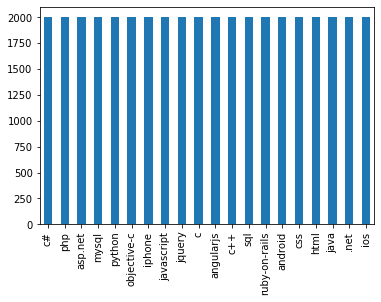

In [6]:
text.tags.value_counts().plot(kind = 'bar')
text['post'].apply(lambda x: len(x.split(' '))).sum()

Start preprocessing the dataset
For this dta set we will perform 1.Removing punctuations
                                 2.HTML decoding
                                 3.Converting to lower case
                                 4.Tokenization
                                 5.Removing stopwords
                                 6.Stemming/lemmetization
                                 7.Converting into Document term matrix or Term document matrix using Countvectorizer

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

I am writing small functions for all these preprocessing steps

function for removing the punctuations 

In [8]:
def rem_punct(text):
    cl_text = "".join([char for char in text if char not in string.punctuation])
    return cl_text

In [9]:
text['punct_rem'] = text['post'].apply(lambda x :rem_punct(x))

In [10]:
text.head(3)

,post,tags,punct_rem
0,what is causing this behavior in our c# datet...,c#,what is causing this behavior in our c dateti...
1,have dynamic html load as if it was in an ifra...,asp.net,have dynamic html load as if it was in an ifra...
2,how to convert a float value in to min:sec i ...,objective-c,how to convert a float value in to minsec i m...


Function to convert into lowercase the text

In [12]:
def to_lower(text):
    l_text = text.lower()
    return l_text
text['lower_text']  =text['punct_rem'].apply(lambda x :to_lower(x))


In [13]:
text.head()

,post,tags,punct_rem,lower_text
0,what is causing this behavior in our c# datet...,c#,what is causing this behavior in our c dateti...,what is causing this behavior in our c dateti...
1,have dynamic html load as if it was in an ifra...,asp.net,have dynamic html load as if it was in an ifra...,have dynamic html load as if it was in an ifra...
2,how to convert a float value in to min:sec i ...,objective-c,how to convert a float value in to minsec i m...,how to convert a float value in to minsec i m...
3,.net framework 4 redistributable just wonderi...,.net,net framework 4 redistributable just wonderin...,net framework 4 redistributable just wonderin...
4,trying to calculate and print the mean and its...,python,trying to calculate and print the mean and its...,trying to calculate and print the mean and its...


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize,max_df = 3000,min_df =20)
text_counts= cv.fit_transform(text['lower_text'])
text_counts.shape

(40000, 6777)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
en_t = le.fit_transform(text.tags)
text['target'] = en_t
text.head()

,post,tags,punct_rem,lower_text,target
0,what is causing this behavior in our c# datet...,c#,what is causing this behavior in our c dateti...,what is causing this behavior in our c dateti...,5
1,have dynamic html load as if it was in an ifra...,asp.net,have dynamic html load as if it was in an ifra...,have dynamic html load as if it was in an ifra...,3
2,how to convert a float value in to min:sec i ...,objective-c,how to convert a float value in to minsec i m...,how to convert a float value in to minsec i m...,15
3,.net framework 4 redistributable just wonderi...,.net,net framework 4 redistributable just wonderin...,net framework 4 redistributable just wonderin...,0
4,trying to calculate and print the mean and its...,python,trying to calculate and print the mean and its...,trying to calculate and print the mean and its...,17


In [65]:
x_train,x_test,y_train,y_test = train_test_split(text_counts,text.target,test_size= 0.2)


# Naive bayes on BOW

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
nb = MultinomialNB()
model = nb.fit(x_train,y_train)
predicted = model.predict(x_test)
accuracy  = metrics.accuracy_score(y_test,predicted)
accuracy

0.7235

# Random forest classifer on BOW

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc  = RandomForestClassifier()
nb_model = rc.fit(x_train,y_train)
nb_predicted = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test,nb_predicted)
nb_accuracy

# SVC on BOW

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv_model = sv.fit(x_train,y_train)
sv_predicted = sv_model.predict(x_test)
sv_accuracy = accuracy_score(y_test,sv_predicted)
sv_accuracy

# try with tfidf vectoriser

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf_count = tf.fit_transform(text['lower_text'])
tf_count.shape

(40000, 363610)

In [46]:
x1_train,x1_test,y1_train,y1_test = train_test_split(tf_count,text.target,test_size = 0.2)

# Naive bayes on tfidf

In [51]:
nb1 = MultinomialNB()
model1 = nb1.fit(x1_train,y1_train)
model1
predicted1 = model1.predict(x1_test)
accuracy1 = accuracy_score(y1_test,predicted1)
accuracy1

0.738875

# svc on tfidf

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv_model1 = sv.fit(x1_train,y1_train)
sv_predicted1 = sv_model1.predict(x1_test)
sv_accuracy1 = accuracy_score(y1_test,sv_predicted1)
sv_accuracy1

D:\Installations\Anaconda\Anaconda_installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Random forest classifier on tfidf 

In [56]:
from sklearn.ensemble import RandomForestClassifier
rc1  = RandomForestClassifier()
rc_model1 = rc1.fit(x1_train,y1_train)
rc_predicted1 = rc_model1.predict(x1_test)
rc_accuracy = accuracy_score(y1_test,rc_predicted1)
rc_accuracyb

D:\Installations\Anaconda\Anaconda_installation\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.57225

function to tokenize the text

In [83]:
def tokens(text):
    token = word_tokenize(text)
    return token

In [84]:
text.lower_text.apply(lambda x : tokens(x))

0        [what, is, causing, this, behavior, in, our, c...
1        [have, dynamic, html, load, as, if, it, was, i...
2        [how, to, convert, a, float, value, in, to, mi...
3        [net, framework, 4, redistributable, just, won...
4        [trying, to, calculate, and, print, the, mean,...
                               ...                        
39995    [different, output, if, at, end, of, function,...
39996    [multiple, arrays, is, there, a, way, to, acce...
39997    [c, how, to, differentiate, a, second, same, k...
39998    [statego, not, working, url, is, being, append...
39999    [understanding, the, mechanisms, of, intentser...
Name: lower_text, Length: 40000, dtype: object

In [ ]:
text['tokens'] = text['lower_text'].apply(lambda x : tokens(x))


Remove the stop words



In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
def rem_stopwords(text):
    words = [word for word in text if word not in stopwords]
    return words
text['words'] = text['tokens'].apply(lambda x :rem_stopwords(x))


0        [causing, behavior, c, datetime, type, precode...
1        [dynamic, html, load, iframe, aspnet, 40, site...
2        [convert, float, value, minsec, trying, conver...
3        [net, framework, 4, redistributable, wondering...
4        [trying, calculate, print, mean, returning, fu...
                               ...                        
39995    [different, output, end, function, rather, mai...
39996    [multiple, arrays, way, accessstore, multiple,...
39997    [c, differentiate, second, key, press, using, ...
39998    [statego, working, url, appended, end, url, lo...
39999    [understanding, mechanisms, intentservice, try...
Name: words, Length: 40000, dtype: object

Perform lemmetization of words 

In [ ]:
wl = nltk.WordNetLemmatizer()
def lemmet(text):
    lem = [wl.lemmatize(x) for x in text]
    return lem

import nltk
nltk.download('wordnet')

In [ ]:
text['final_text']  = text['words'].apply(lambda x :lemmet(x))

In [ ]:
text.head(6)

Removing numbers

In [49]:
def rem_numbers(text):
    num = [x for x in text if not x.isnumeric()]
    return num
text['TEXT'] = text['final_text'].apply(lambda x:rem_numbers(x))

In [ ]:
text.TEXT.head(3)

In [ ]:
x = text.TEXT
y = text.tags

In [121]:
text.columns

Index(['post', 'tags'], dtype='object')

In [120]:
#Final_text = text.drop(['post','punct_rem','lower_text','tokens','words','final_text'],axis=1)


In [122]:
Final_text.head()

,TEXT,target
0,"[causing, behavior, c, datetime, type, precode...",5
1,"[dynamic, html, load, iframe, aspnet, site, us...",3
2,"[convert, float, value, minsec, trying, conver...",15
3,"[net, framework, redistributable, wondering, g...",0
4,"[trying, calculate, print, mean, returning, fu...",17


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
en_y = le.fit_transform(Final_text.tags)
Final_text['target'] = en_y
Final_text.head()
Final_text = Final_text.drop(['tags'],axis = 1)


In [119]:
te = ['sairam','ram','rrrr','tttttt','yyyyyy']
cv = CountVectorizer()
bow = cv.fit_transform(te)
bow.toarray()

array([[0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.2)
x_train.shape

model building using pipeline in sklearn with MULTINOMIALNB 